<a href="https://colab.research.google.com/github/arko-14/car-prices-prediction/blob/main/car_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
markmedhat_car_model_path = kagglehub.dataset_download('markmedhat/car-model')

print('Data source import complete.')


100%|██████████| 353/353 [00:00<00:00, 143kB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('/content/drive/MyDrive/carprices.csv')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [8]:
df.groupby("Car Model").mean()

,Mileage,Sell Price($),Age(yrs)
Car Model,,,
Audi A5,68500.0,23175.0,6.00
BMW X5,45900.0,29920.0,4.00
Mercedez Benz C class,72000.0,24000.0,6.25


In [9]:
dummy = pd.get_dummies(df['Car Model'])

dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [10]:
#Getting data in integer
dummy=dummy.astype(int)

dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [11]:
combined_data = pd.concat([df,dummy],axis='columns')
combined_data

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [12]:
out = combined_data.drop(['Car Model'], axis='columns')
out

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [13]:
out = out.drop(['Audi A5'], axis='columns')
out

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [14]:
X = out.iloc[:, [0, 2, 3, 4]].values
y =out.iloc[:,1].values

In [ ]:
#import scikit-learn

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X)

Accuracy of the model

In [19]:
model.score(X_train,y_train)

0.9371683634008452


#  Car predict code:-

# 1. 0,0 for Mercedez Benz C class

# 2. 0,1 for BMW X5
# 3. 1,0 for Audi A5

 A5

# ** Predict price of a BMW X5 that is 10 yr old with mileage 90000**

In [20]:
model.predict([[90000,10,0,1]])

array([13635.2532097])

#  Predict price of a Mercedes Benz C Class that is 8 yr old with mileage 62000

In [21]:
model.predict([[62000,8,0,0]])

array([24999.54529244])

In [22]:
import matplotlib.pyplot as plt

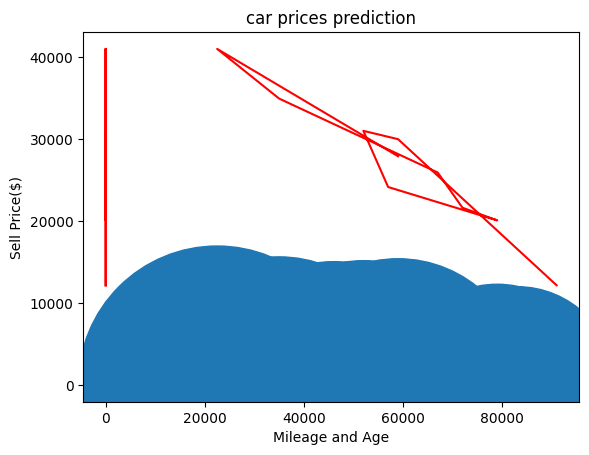

In [23]:
plt.scatter(df['Mileage'],df['Age(yrs)'],df['Sell Price($)'])
plt.plot(X_train,model.predict(X_train),color='red')
plt.xlabel('Mileage and Age')
plt.ylabel('Sell Price($)')
plt.title('car prices prediction')
plt.show()